In [1]:
import vplanet_inference as vpi
import numpy as np
import scipy
import os
import astropy.units as u
import multiprocessing as mp

import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator
from matplotlib import rc
plt.style.use('classic')
rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)
rc('figure', facecolor='w')
rc('xtick', labelsize=20)
rc('ytick', labelsize=20)

inpath = os.path.join(vpi.INFILE_DIR, "stellar_eqtide/ctl")

np.random.seed(20)

In [2]:
inparams = {"primary.dMass": u.Msun, 
            "secondary.dMass": u.Msun,  
            "primary.dRotPeriod": u.day, 
            "secondary.dRotPeriod": u.day, 
            "primary.dTidalTau": u.dex(u.s), 
            "secondary.dTidalTau": u.dex(u.s), 
            "secondary.dEcc": u.dimensionless_unscaled, 
            "secondary.dOrbPeriod": u.day,
            "vpl.dStopTime": u.Gyr,
           }

outparams = {"final.primary.RotPer": u.day, 
             "final.primary.TideLock": None,
             "final.secondary.RotPer": u.day,
             "final.secondary.OrbPeriod": u.day,
             "final.secondary.Eccentricity": u.dimensionless_unscaled,
             "final.secondary.SemiMajorAxis": u.AU,
             "final.secondary.OrbAngMom": u.kg*u.m**2/u.s,
             "final.secondary.TotOrbEnergy": u.kg*u.m**2/u.s**2,
             "final.secondary.TideLock": None,
            }

vpm = vpi.VplanetModel(inparams, inpath=inpath, outparams=outparams, timesteps=1e4*u.yr, time_init=5e6*u.yr)

In [14]:
nsim = 30
mass1 = np.ones(nsim)
mass2 = np.ones(nsim)
prot1 = np.random.uniform(4, 12, nsim)
prot2 = np.random.uniform(4, 12, nsim)
porb = np.random.uniform(4, 12, nsim)
eccs = np.random.uniform(0.1, 0.6, nsim)
ages = 9 * np.ones(nsim)

def random_theta(tau_true):
    
    tau = tau_true * np.ones(nsim)
    
    return np.array([mass1, mass2, prot1, prot2, tau, tau, eccs, porb, ages]).T

In [16]:
def b_func(e):
    return np.sqrt(1 - e**2)

def f1_func(e):
    return 1 + 31/2*e**2 + 255/8*e**4 + 185/16*e**6 + 25/64*e**8
def f2_func(e):
    return 1 + 15/2*e**2 + 45/8*e**4 + 5/16*e**6
def f3_func(e):
    return 1 + 15/4*e**2 + 15/8*e**4 + 5/64*e**6
def f4_func(e):
    return 1 + 3/2*e**2 + 1/8*e**4
def f5_func(e):
    return 1 + 3*e**2 + 3/8*e**4

In [17]:
def peq_ctl(porb, ecc):
    # porb, ecc = par
    return porb * b_func(ecc)**3 * f5_func(ecc) / f2_func(ecc)

porb_arr = np.arange(0,12,.5)
ecc_arr = np.arange(0,.6,.05)
X, Y = np.meshgrid(porb_arr, ecc_arr)
Z = peq_ctl(X, Y)

In [51]:
output = vpm.run_model(random_theta(-1)[0], remove=True)


Input:
-----------------
primary.dMass : 1.0 [solMass] (user)   --->   1.988409870698051e+30 [kg] (vpl file)
secondary.dMass : 1.0 [solMass] (user)   --->   1.988409870698051e+30 [kg] (vpl file)
primary.dRotPeriod : 7.207374970277992 [d] (user)   --->   622717.1974320185 [s] (vpl file)
secondary.dRotPeriod : 7.718221283537092 [d] (user)   --->   666854.3188976048 [s] (vpl file)
primary.dTidalTau : -1.0 [dex(s)] (user)   --->   0.1 [s] (vpl file)
secondary.dTidalTau : -1.0 [dex(s)] (user)   --->   0.1 [s] (vpl file)
secondary.dEcc : 0.18861411604620057 [] (user)   --->   0.18861411604620057 [] (vpl file)
secondary.dOrbPeriod : 6.996035545211762 [d] (user)   --->   604457.4711062963 [s] (vpl file)
vpl.dStopTime : 9.0 [Gyr] (user)   --->   2.840184e+17 [s] (vpl file)

Created file output//232762192976243/vpl.in
Created file output//232762192976243/primary.in
Created file output//232762192976243/secondary.in
Executed model output//232762192976243/vpl.in 25.172 s

Output:
-----------------

In [6]:
sims_n3 = []
for tt in random_theta(-3):
    sims_n3.append(vpm.run_model(tt, remove=True))
    
sims_n2 = []
for tt in random_theta(-2):
    sims_n2.append(vpm.run_model(tt, remove=True))
    
sims_n1 = []
for tt in random_theta(-1):
    sims_n1.append(vpm.run_model(tt, remove=True))
    
sims_p0 = []
for tt in random_theta(0):
    sims_p0.append(vpm.run_model(tt, remove=True))
    
sims_p1 = []
for tt in random_theta(1):
    sims_p1.append(vpm.run_model(tt, remove=True))
    
sims_p2 = []
for tt in random_theta(2):
    sims_p2.append(vpm.run_model(tt, remove=True))


Input:
-----------------
primary.dMass : 0.1 [solMass] (user)   --->   1.988409870698051e+29 [kg] (vpl file)
secondary.dMass : 0.1 [solMass] (user)   --->   1.988409870698051e+29 [kg] (vpl file)
primary.dRotPeriod : 4.40884159908927 [d] (user)   --->   380923.914161313 [s] (vpl file)
secondary.dRotPeriod : 6.409270498722647 [d] (user)   --->   553760.9710896368 [s] (vpl file)
primary.dTidalTau : -3.0 [dex(s)] (user)   --->   0.001 [s] (vpl file)
secondary.dTidalTau : -3.0 [dex(s)] (user)   --->   0.001 [s] (vpl file)
secondary.dEcc : 0.5418185313765148 [] (user)   --->   0.5418185313765148 [] (vpl file)
secondary.dOrbPeriod : 11.240277481909033 [d] (user)   --->   971159.9744369404 [s] (vpl file)
vpl.dStopTime : 9.0 [Gyr] (user)   --->   2.840184e+17 [s] (vpl file)

Created file output//172632257713705/vpl.in
Created file output//172632257713705/primary.in
Created file output//172632257713705/secondary.in
Executed model output//172632257713705/vpl.in 26.171 s

Output:
----------------

In [ ]:
pool = mp.Pool(20)

sims_n2 = pool.map(vpm.run_model, random_theta(-2))


Input:
Input:


Input:
Input:
Input:
Input:
Input:
Input:-----------------
Input:
Input:-----------------
Input:
Input:
Input:

Input:


Input:
Input:


Input:

Input:





primary.dMass : 1.0 [solMass] (user)   --->   1.988409870698051e+30 [kg] (vpl file)
----------------------------------

----------------------------------
-----------------
----------------------------------
primary.dMass : 1.0 [solMass] (user)   --->   1.988409870698051e+30 [kg] (vpl file)---------------------------------------------------
-----------------

----------------------------------

-----------------
-----------------

-----------------



secondary.dMass : 1.0 [solMass] (user)   --->   1.988409870698051e+30 [kg] (vpl file)
primary.dMass : 1.0 [solMass] (user)   --->   1.988409870698051e+30 [kg] (vpl file)primary.dMass : 1.0 [solMass] (user)   --->   1.988409870698051e+30 [kg] (vpl file)

primary.dMass : 1.0 [solMass] (user)   --->   1.988409870698051e+30 [kg] (vpl file)primary.dMass : 1.0 [solMass] (us

File: vpl.in
File: vpl.in
File: primary.in
File: primary.in
File: secondary.in
File: secondary.in
File: vpl.in
File: vpl.in
File: primary.in
File: primary.in
File: secondary.in
File: secondary.in
File: vpl.in
File: vpl.in
File: primary.in
File: primary.in
File: secondary.in
File: secondary.in
Body: primary
Body: secondary
Body: primary
Body: secondary
Body: primary
Body: secondary
Body: primary
Body: secondary
Body: primary
Body: secondary
Body: primary
Body: secondary
File: vpl.in
File: vpl.in
File: primary.in
File: primary.in
File: secondary.in
File: secondary.in
File: vpl.in
File: vpl.in
File: primary.in
File: primary.in
File: secondary.in
File: secondary.in
Body: primary
Body: secondary
Body: primary
Body: secondary
Body: primary
Body: secondary
Body: primary
Body: secondary
File: vpl.in
File: vpl.in
File: primary.in
File: primary.in
File: secondary.in
File: secondary.in
File: vpl.in
File: vpl.in
File: primary.in
File: primary.in
File: secondary.in
File: secondary.in
Body: primary


In [8]:
sims_n1 = pool.map(vpm.run_model, random_theta(-1))
sims_p0 = pool.map(vpm.run_model, random_theta(0))
sims_p1 = pool.map(vpm.run_model, random_theta(1))
sims_p2 = pool.map(vpm.run_model, random_theta(2))


Input:
Input:
Input:



Input:---------------------------------------------------
Input:

Input:


Input:

Input:

Input:-----------------
Input:
primary.dMass : 1.0 [solMass] (user)   --->   1.988409870698051e+30 [kg] (vpl file)primary.dMass : 1.0 [solMass] (user)   --->   1.988409870698051e+30 [kg] (vpl file)
primary.dMass : 1.0 [solMass] (user)   --->   1.988409870698051e+30 [kg] (vpl file)
-----------------


-----------------


Input:
Input:
----------------------------------
-----------------primary.dMass : 1.0 [solMass] (user)   --->   1.988409870698051e+30 [kg] (vpl file)-----------------
secondary.dMass : 1.0 [solMass] (user)   --->   1.988409870698051e+30 [kg] (vpl file)secondary.dMass : 1.0 [solMass] (user)   --->   1.988409870698051e+30 [kg] (vpl file)

secondary.dMass : 1.0 [solMass] (user)   --->   1.988409870698051e+30 [kg] (vpl file)
primary.dMass : 1.0 [solMass] (user)   --->   1.988409870698051e+30 [kg] (vpl file)



primary.dMass : 1.0 [solMass] (user)   --->   1.98

File: vpl.in
File: vpl.in
File: primary.in
File: primary.in
File: secondary.in
File: secondary.in
Body: primary
Body: secondary
Body: primary
Body: secondary
File: vpl.in
File: vpl.in
File: primary.in
File: primary.in
File: secondary.in
File: secondary.in
Body: primary
Body: secondary
Body: primary
Body: secondary
File: vpl.in
File: vpl.in
File: primary.in
File: primary.in
File: secondary.in
File: secondary.in
Body: primary
Body: secondary
Body: primary
Body: secondary
File: vpl.in
File: vpl.in
File: primary.in
File: primary.in
File: secondary.in
File: secondary.in
File: vpl.in
File: vpl.in
File: primary.in
File: primary.in
File: secondary.in
File: secondary.in
Body: primary
Body: secondary
Body: primary
Body: secondary
Body: primary
Body: secondary
Body: primary
Body: secondary
File: vpl.in
File: vpl.in
File: primary.in
File: primary.in
File: secondary.in
File: secondary.in
Body: primary
Body: secondary
Body: primary
Body: secondary
File: vpl.in
File: vpl.in
File: primary.in
File: pri

In [9]:
np.savez("sims3d", sims_n2=sims_n2, sims_n1=sims_n1, sims_p0=sims_p0, sims_p1=sims_p1, sims_p2=sims_p2)

In [6]:
res = np.load("sims3d.npz", allow_pickle=True)
sims_n2 = res["sims_n2"]
sims_n1 = res["sims_n1"]
sims_p0 = res["sims_p0"]
sims_p1 = res["sims_p1"]
sims_p2 = res["sims_p2"]

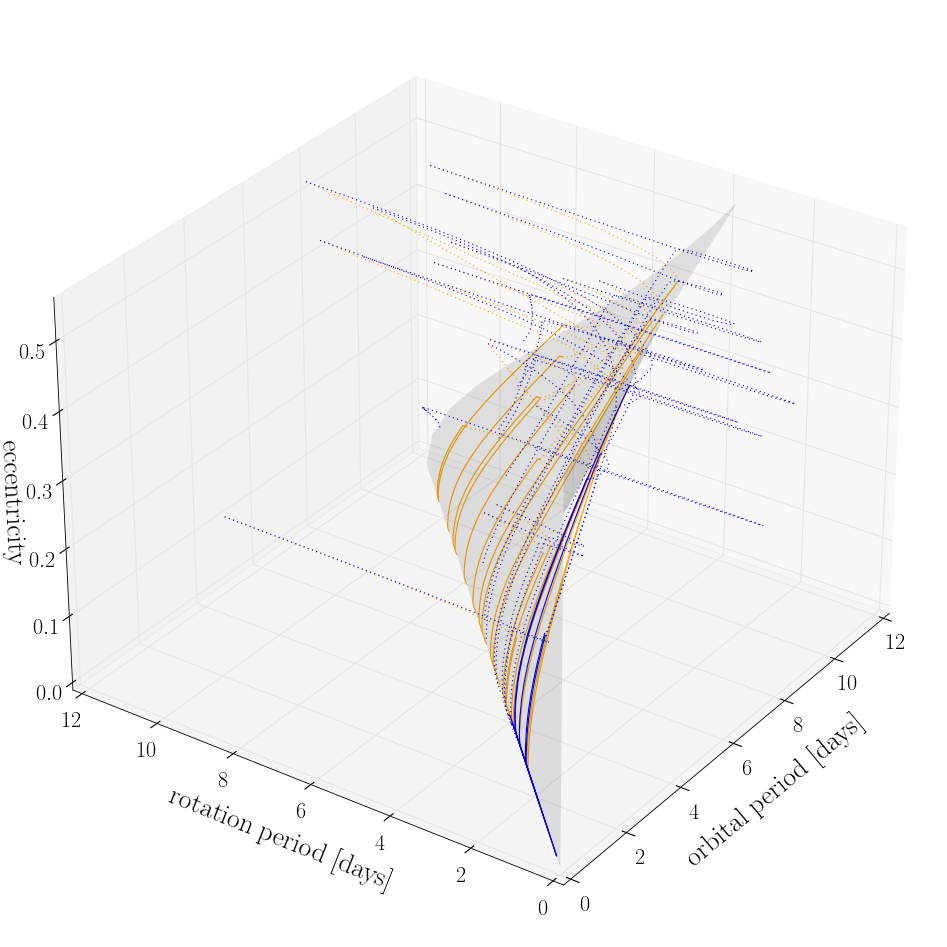

In [13]:
# %matplotlib widget
%matplotlib inline

fig = plt.figure(figsize=[12,12])
ax = plt.axes(projection='3d')

ax.plot_surface(X, Z, Y, edgecolor ='none', color="k", alpha=.1)

# strong tides
for output in sims_p0:
    tl = output['final.secondary.TideLock']
    xporb, yprot, zecc = output['final.secondary.OrbPeriod'].value, output['final.secondary.RotPer'].value, output['final.secondary.Eccentricity'].value
    ax.plot(xporb[tl == 0], yprot[tl == 0], zecc[tl == 0], linewidth=1, color='orange', linestyle='dotted')
    ax.plot(xporb[tl == 1], yprot[tl == 1], zecc[tl == 1], linewidth=1, color='orange')
    
# weak tides
for output in sims_n2:
    tl = output['final.secondary.TideLock']
    xporb, yprot, zecc = output['final.secondary.OrbPeriod'].value, output['final.secondary.RotPer'].value, output['final.secondary.Eccentricity'].value
    ax.plot(xporb[tl == 0], yprot[tl == 0], zecc[tl == 0], linewidth=1, color='b', linestyle='dotted')
    ax.plot(xporb[tl == 1], yprot[tl == 1], zecc[tl == 1], linewidth=1, color='b')

ax.set_xlim(0,12)
ax.set_ylim(0,12)
ax.set_zlim(0,0.55)
ax.set_xlabel("orbital period [days]", fontsize=25, labelpad=15)
ax.set_ylabel("rotation period [days]", fontsize=25, labelpad=15)
ax.set_zlabel("eccentricity", fontsize=25)
# ax.tick_params(axis='both', which='major', pad=-20)

# Set the orientation
ax.view_init(elev=30, azim=-145)

plt.tight_layout()
plt.savefig("3dplot.png", dpi=300, bbox_inches='tight')
plt.show()